In [1]:
import pandas as pd
import numpy as np


In [247]:
df = pd.read_excel('../data/analysis_data.xlsx')

In [248]:
df.head()

,month,price,pop,bott,bott_pc,exp_q,exp_val,tariff,duty_val_world,q_world,...,prop_cl,duty_r_cl,cif_r_cl,duty_val_row,q_row,cif_row,duty_row,prop_row,cif_r_row,duty_r_row
0,2000-01-31,5.299029,281083000,1.244070e+08,0.442599,22385348,4.419970e+07,False,1.298947e+08,30869692,...,0.227214,0.077259,0.185041,7.736194e+06,2402418,550866.019417,162756.310680,0.084392,0.229296,0.067747
1,2000-02-29,5.198813,281299000,1.375283e+08,0.488904,20954045,4.088633e+07,False,1.389756e+08,27334547,...,0.135643,0.062336,0.177765,8.226432e+06,2118152,504564.787339,163492.581602,0.083999,0.238210,0.077186
2,2000-03-31,5.311650,281531000,1.603837e+08,0.569684,20240059,4.023967e+07,False,1.635349e+08,33950034,...,0.110888,0.062623,0.188203,9.613827e+06,2900608,710128.155340,191233.009709,0.093419,0.244820,0.065929
3,2000-04-30,5.104950,281763000,1.423004e+08,0.505036,21745478,4.100174e+07,False,1.727178e+08,37381318,...,0.171759,0.070914,0.181233,9.347779e+06,2577645,598792.079208,177575.247525,0.074062,0.232302,0.068890
4,2000-05-31,5.426889,281996000,1.612658e+08,0.571873,22059299,4.187646e+07,False,1.744802e+08,38726698,...,0.128741,0.061651,0.188860,9.571486e+06,2554428,626929.342493,193309.126595,0.070618,0.245428,0.075676


In [249]:
df.columns

Index(['month', 'price', 'pop', 'bott', 'bott_pc', 'exp_q', 'exp_val',
       'tariff', 'duty_val_world', 'q_world', 'cif_world', 'duty_world',
       'duty_val_bloc', 'q_bloc', 'cif_bloc', 'duty_bloc', 'prop_bloc',
       'duty_r_bloc', 'cif_r_bloc', 'duty_val_it', 'q_it', 'cif_it', 'duty_it',
       'prop_it', 'duty_r_it', 'cif_r_it', 'duty_val_au', 'q_au', 'cif_au',
       'duty_au', 'prop_au', 'duty_r_au', 'cif_r_au', 'duty_val_cl', 'q_cl',
       'cif_cl', 'duty_cl', 'prop_cl', 'duty_r_cl', 'cif_r_cl', 'duty_val_row',
       'q_row', 'cif_row', 'duty_row', 'prop_row', 'cif_r_row', 'duty_r_row'],
      dtype='object')

In [250]:
cols = ["month", "price", "bott", "duty_bloc", "tariff", "duty_world", "duty_r_bloc", "q_bloc", "q_world", "cif_world"]
df = df[cols]

df.head()

,month,price,bott,duty_bloc,tariff,duty_world,duty_r_bloc,q_bloc,q_world,cif_world
0,2000-01-31,5.299029,1.244070e+08,678934.951456,False,2.250568e+06,0.077427,8768676,30869692,6.853057e+06
1,2000-02-29,5.198813,1.375283e+08,848555.885262,False,2.126339e+06,0.094685,8961916,27334547,6.089141e+06
2,2000-03-31,5.311650,1.603837e+08,887386.407767,False,2.516082e+06,0.084715,10474993,33950034,7.495030e+06
3,2000-04-30,5.104950,1.423004e+08,965145.544554,False,2.790541e+06,0.086731,11128077,37381318,8.363492e+06
4,2000-05-31,5.426889,1.612658e+08,880599.607458,False,2.742312e+06,0.080982,10874051,38726698,8.921802e+06


In [251]:
def separate_endog_and_exog(df, endog, exog):
    endog_data = df[endog]
    exog_data = df[exog]
    # add intercept
    # exog_data.insert(0, 'intercept', 1)

    # convert dfs to matrices
    x = exog_data.to_numpy()
    y = endog_data.to_numpy()

    return y, x

In [252]:
endog = ['price', 'q_bloc', 'q_world']
exog = ['duty_bloc', 'duty_r_bloc', 'tariff', 'duty_world', 'cif_world']

zt, xt = separate_endog_and_exog(df, endog, exog)

In [256]:
# calculate dimensions for exogenous variables
if xt.shape[1] < 1:
    m = -1
    k_x = 0
else:
    k_x = xt.shape[1]
# validate lags are non-negative
if p < 0:
    p = 0

In [264]:
include_mean = True
if include_mean:
    xmtx = np.ones(nT-ist)
    xmtx = xmtx.reshape((xmtx.shape[0], 1))

In [266]:
# let's define the columns so that we can keep track of which values are for which columns
cols = endog
cols_exog = exog
# cols = np.concatenate([endog, exog])

In [267]:
# add in the lags for endog variables
if p > 0:
    for i in range(p):
        xmtx = np.concatenate((xmtx, zt[(ist-i-1):(nT-i-1),]), axis=1)
        if i > 0:
            new_cols = [c + '_l' + str(i) for c in endog]
            # update list of column names
            cols = np.concatenate([new_cols, cols])
# add in the lags for exog variables
if m > -1:
    for i in range(m+1):
        xmtx = np.concatenate((xmtx, xt[(ist-i):(nT-i),]), axis=1)
        # update exog column names
        if i > 0:
            new_cols_exog = [c + '_l' + str(i) for c in exog]
            cols_exog = np.concatenate([new_cols_exog, cols_exog])

# update entire set of columns
cols = np.concatenate([cols, cols_exog])
cols = np.concatenate([['intercept'], cols])

In [268]:
xmtx.shape

(262, 22)

In [269]:
p1 = xmtx.shape[1]
nobe = xmtx.shape[0]

In [270]:
xpx = np.dot(xmtx.T, xmtx)

In [271]:
cols

array(['intercept', 'price_l1', 'q_bloc_l1', 'q_world_l1', 'price',
       'q_bloc', 'q_world', 'duty_bloc_l2', 'duty_r_bloc_l2', 'tariff_l2',
       'duty_world_l2', 'cif_world_l2', 'duty_bloc_l1', 'duty_r_bloc_l1',
       'tariff_l1', 'duty_world_l1', 'cif_world_l1', 'duty_bloc',
       'duty_r_bloc', 'tariff', 'duty_world', 'cif_world'], dtype='<U14')

In [274]:
xpy = np.dot(xmtx.T, yt)

In [281]:
yt.shape

(262, 3)

In [282]:
xpx.shape

(22, 22)

In [286]:
xpy

array([[2165.192635659071, 4339904398.0, 20317310872.0],
       [18349.571398564924, 37008351315.102905, 175790734935.9624],
       [37014451126.50875, 7.601562891486576e+16, 3.5639958972635795e+17],
       [175467300996.32077, 3.5468641204198656e+17,
        1.6986846191954767e+18],
       [18509.34166866306, 36924511633.382195, 175398736362.7329],
       [36858138636.76801, 7.476643351005216e+16, 3.5367424317150176e+17],
       [174567644332.0617, 3.516473379579188e+17, 1.6875229887622213e+18],
       [4993151379.648457, 1.0352364671088888e+16,
        5.0182092006667944e+16],
       [279.38161093630134, 560746608.3130232, 2734792611.5934362],
       [204.1956144473093, 437177232.0, 2192920900.0],
       [12220739498.660559, 2.4981959234890704e+16,
        1.2010037432706901e+17],
       [34360090337.91957, 7.0554789276816776e+16, 3.317167224163935e+17],
       [4997559642.909006, 1.019010510446276e+16, 4.9803916708096984e+16],
       [279.7254458377028, 562479143.233094, 2738711105.

In [287]:
# import scipy.linalg

In [290]:
xpx.shape

(22, 22)

In [294]:
xpx = xpx.astype(float)

In [295]:
xpxi = np.linalg.inv(xpx)

In [298]:
beta = np.dot(xpxi, xpy)

In [300]:
# these beta values are the coefficients of price, q_bloc, and q_world (the endogenous variables)
beta.shape

(22, 3)

In [301]:
beta

array([[0.3329008845980326, 5614200.624198228, -3468427.615319848],
       [-0.004484727392386034, -444.9056329615414, 1009659.1621311903],
       [-4.264449599624158e-09, 0.3928661986041533, -0.3215621580480956],
       [1.8526173837485915e-09, -0.012603190593726055,
        0.5045213282809016],
       [0.9269600156760793, 34283.09478555806, 903518.9716692269],
       [3.5533307763058663e-09, 0.07343945543387065, 0.15095489935748674],
       [2.944722625017805e-09, 0.07739235526941535, 0.30406541376100904],
       [-1.0488973899132277e-07, 2.113313445315214, -7.889225125406597],
       [-0.014375629016853964, -39525182.79546654, -56964780.35711527],
       [0.22658367326700812, -1363052.5205810666, -2204665.3285360336],
       [7.394795284089591e-08, -0.0999305992304329, 10.74936921430617],
       [-1.9043310691209305e-08, 0.7708554330031561, 1.4981595556699006],
       [7.559007376942996e-08, 0.1731146157425485, 5.206040315436212],
       [0.24599776604588897, 1260523.6516458988, 181

In [302]:
resi = yt - np.dot(xmtx, beta)

In [304]:
resi.shape

(262, 3)

In [308]:
sig = np.matmul(resi.T, resi) / nobe

In [309]:
sig

array([[0.09562574389358383, -22016.216386953958, -89495.1419672928],
       [-22016.216386953958, 1796788192910.1694, 913627039718.1187],
       [-89495.1419672928, 913627039718.1187, 13818282857901.414]],
      dtype=object)

In [310]:
co = np.kron(sig, xpxi)

In [314]:
co_diag = np.diag(co)

In [316]:
co_diag.shape

(66,)

In [321]:
se = co_diag**(1/2)

In [323]:
se.shape

(66,)

In [338]:
se_beta = se.reshape((beta.shape[0], k), order='F')

In [341]:
se_beta.shape

(22, 3)

In [343]:
n_par = beta.shape[0] * k

In [347]:
sig

array([[0.09562574389358383, -22016.216386953958, -89495.1419672928],
       [-22016.216386953958, 1796788192910.1694, 913627039718.1187],
       [-89495.1419672928, 913627039718.1187, 13818282857901.414]],
      dtype=object)

In [350]:
sig = sig.astype(float)
sig_det = np.linalg.det(sig)

In [351]:
d_1 = np.log(sig_det)

In [352]:
d_1

56.08487355949789

In [353]:
aic = d_1 + 2 * n_par / nobe

In [354]:
aic

56.58869035339102

In [355]:
bic = d_1 + np.log(nobe) * n_par / nobe

In [356]:
bic

57.487586297086565

In [357]:
beta = np.zeros((p1, k))

In [358]:
beta.shape

(22, 3)

In [359]:
se_beta = np.ones((p1, k))

In [360]:
se_beta.shape

(22, 3)

In [361]:
resi = yt

In [362]:
resi.shape

(262, 3)

In [363]:
n_par = 0

In [370]:
p1

22

In [386]:
fixed = np.NaN

if (np.isnan(fixed)):
    xpx = np.dot(xmtx.T, xmtx)
    xpx = xpx.astype(float)
    xpy = np.dot(xmtx.T, yt)
    xpxi = np.linalg.inv(xpx)
    beta = np.dot(xpxi, xpy)
    resi = yt - np.dot(xmtx, beta)
    sig = np.matmul(resi.T, resi) / nobe
    co = np.kron(sig, xpxi)
    co_diag = np.diag(co)
    se = co_diag**(1/2)
    se_beta = se.reshape((beta.shape[0], k), order='F')
    n_par = beta.shape[0] * k
    sig = sig.astype(float)
    sig_det = np.linalg.det(sig)
    d_1 = np.log(sig_det)
    aic = d_1 + 2 * n_par / nobe
    bic = d_1 + np.log(nobe) * n_par / nobe
else:
    beta = np.zeros((p1, k))
    se_beta = np.ones((p1, k))
    resi = yt
    n_par = 0
    for i in range(k):
        # id_x = range(p1)[fixed[:i] > 0]
        id_x = np.argwhere(np.any(fixed[:, i] == 1))
        n_par = n_par + len(id_x)
        if (len(id_x) > 0):
            x_m = xmtx[:, id_x]
            y_1 = yt[:, i].reshape((nobe, 1))
            xpx = np.dot(x_m.T, x_m)
            xpy = np.dot(x_m.T, y_1)
            xpx = xpx.astype(float)
            xpxi = np.linalg.solve(xpx)
            beta_1 = np.dot(xpxi, xpy)
            res = y_1 - np.dot(x_m, beta_1)
            sig_1 = np.sum(res**2) / nobe
            sig_1 = sig_1.astype(float)
            diag_sig_1 = np.diag(xpxi) * sig_1
            se = diag_sig_1**(1/2)
            beta[id_x, i] = beta_1
            se_beta[id_x, i] = se
            resi[:, i] = res
    sig = np.matmul(resi.T, resi) / nobe
    sig = sig.astype(float)
    d_1 = np.log(np.linalg.det(sig))
    aic = d_1 + 2 * n_par / nobe
    bic = d_1 + np.log(nobe) * n_par / nobe

In [387]:
fixed = np.NaN
np.isnan(fixed)

True

In [393]:
beta[0,:]

array([0.3329008845980326, 5614200.624198228, -3468427.615319848],
      dtype=object)

In [514]:
ph0 = np.NaN
icnt = 0

if (include_mean):
    ph0 = beta[0,:]
    icnt = icnt + 1

    print('Constant Term:')
    print('est:', [np.round(i, 4) for i in ph0])
    print('se:', [np.round(i, 4) for i in se_beta[0,:]])

Constant Term:
est: [0.3329, 5614200.6242, -3468427.6153]
se: [0.2766, 1198807.4731, 3324513.0207]


In [515]:
beta[(icnt):(icnt+k*p),].T

array([[-0.004484727392386034, -4.264449599624158e-09,
        1.8526173837485915e-09, 0.9269600156760793,
        3.5533307763058663e-09, 2.944722625017805e-09],
       [-444.9056329615414, 0.3928661986041533, -0.012603190593726055,
        34283.09478555806, 0.07343945543387065, 0.07739235526941535],
       [1009659.1621311903, -0.3215621580480956, 0.5045213282809016,
        903518.9716692269, 0.15095489935748674, 0.30406541376100904]],
      dtype=object)

In [516]:
se_beta[(icnt):(icnt+k*p),].T

array([[0.02430457950841963, 1.592771141795895e-08,
        4.9473799445421175e-09, 0.024025326018983297,
        1.4761458342008096e-08, 5.084039028234845e-09],
       [105353.54194469168, 0.06904216599894573, 0.021445505787215168,
        104143.05631574507, 0.06398678570270362, 0.022037884622691722],
       [292164.69685069245, 0.1914665907443991, 0.05947232130478162,
        288807.79816180957, 0.1774470938726951, 0.061115096475820786]],
      dtype=object)

In [517]:
phi = np.NaN

if (p > 0):
    phi = beta[(icnt):(icnt+k*p),].T
    se_phi = se_beta[(icnt):(icnt+k*p),].T
    for i in range(1, p+1):
        print('AR(' + str(i) + ') matrix:')
        jcnt = (i-1) * k
        print('\n'.join([' '.join(['{:.3f}'.format(item) for item in row]) for row in phi[:,jcnt:(jcnt+k)]]))
        print('standard errors:')
        print('\n'.join([' '.join(['{:.3f}'.format(item) for item in row]) for row in se_phi[:,jcnt:(jcnt+k)]]))
    icnt = icnt + k * p

if (m > -1):
    print('coefficients of exogenous variables:')
    beta_exog = beta[icnt:icnt+(m+1)*k_x,:].T
    se_beta_exog = se_beta[icnt:icnt+(m+1)*k_x,:].T
    if (k_x == 1):
        beta_exog = beta_exog.T
        se_beta_exog = se_beta_exog.T
    for i in range(m):
        jdx = i * k_x
        print('l' + str(i), 'coefficient matrix')
        print('\n'.join([' '.join(['{:.3f}'.format(item) for item in row]) for row in beta_exog[:,jdx:(jdx+k_x)]]))
        print('standard errors:')
        print('\n'.join([' '.join(['{:.3f}'.format(item) for item in row]) for row in se_beta_exog[:,jdx:(jdx+k_x)]]))


AR(1) matrix:
-0.004 -0.000 0.000
-444.906 0.393 -0.013
1009659.162 -0.322 0.505
standard errors:
0.024 0.000 0.000
105353.542 0.069 0.021
292164.697 0.191 0.059
AR(2) matrix:
0.927 0.000 0.000
34283.095 0.073 0.077
903518.972 0.151 0.304
standard errors:
0.024 0.000 0.000
104143.056 0.064 0.022
288807.798 0.177 0.061
coefficients of exogenous variables:
l0 coefficient matrix
-0.000 -0.014 0.227 0.000 -0.000
2.113 -39525182.795 -1363052.521 -0.100 0.771
-7.889 -56964780.357 -2204665.329 10.749 1.498
standard errors:
0.000 1.200 0.275 0.000 0.000
0.358 5199846.749 1193576.823 0.266 0.062
0.992 14420128.843 3310007.468 0.738 0.171
l1 coefficient matrix
0.000 0.246 0.082 -0.000 0.000
0.173 1260523.652 2439542.811 -0.271 -0.362
5.206 18122646.869 11775891.315 -5.828 -0.747
standard errors:
0.000 1.168 0.327 0.000 0.000
0.454 5060801.853 1417676.369 0.386 0.078
1.260 14034531.844 3931476.615 1.072 0.217


In [522]:
print('Residual Covariance Matrix:')
print('\n'.join([' '.join(['{:.5f}'.format(item) for item in row]) for row in sig]))
print('Information Criteria:')
print('AIC:', '{:.3f}'.format(aic))
print('BIC:', '{:.3f}'.format(bic))

Residual Covariance Matrix:
0.09563 -22016.21639 -89495.14197
-22016.21639 1796788192910.16943 913627039718.11865
-89495.14197 913627039718.11865 13818282857901.41406
Information Criteria:
AIC: 56.589
BIC: 57.488


In [523]:
phi

array([[-0.004484727392386034, -4.264449599624158e-09,
        1.8526173837485915e-09, 0.9269600156760793,
        3.5533307763058663e-09, 2.944722625017805e-09],
       [-444.9056329615414, 0.3928661986041533, -0.012603190593726055,
        34283.09478555806, 0.07343945543387065, 0.07739235526941535],
       [1009659.1621311903, -0.3215621580480956, 0.5045213282809016,
        903518.9716692269, 0.15095489935748674, 0.30406541376100904]],
      dtype=object)

In [525]:
nT

264

In [526]:
zt.shape[0]

264

In [529]:
n_t = zt.shape[0]
n_t

264

In [530]:
k = zt.shape[1]
k

3

In [531]:
dim_x = xt.shape[1]
dim_x

5

In [532]:
se = np.NaN

In [533]:
len(ph0)

3

In [539]:
ph0 = ph0.reshape((3, 1))

In [540]:
len(ph0)

3

In [542]:
zt[0:10]

array([[5.29902913e+00, 8.76867600e+06, 3.08696920e+07],
       [5.19881306e+00, 8.96191600e+06, 2.73345470e+07],
       [5.31165049e+00, 1.04749930e+07, 3.39500340e+07],
       [5.10495050e+00, 1.11280770e+07, 3.73813180e+07],
       [5.42688911e+00, 1.08740510e+07, 3.87266980e+07],
       [5.18485742e+00, 1.20819980e+07, 3.82895050e+07],
       [5.49752230e+00, 1.06082760e+07, 3.28310950e+07],
       [5.16601562e+00, 1.18835050e+07, 3.95782780e+07],
       [5.43177388e+00, 1.07217360e+07, 3.36742930e+07],
       [5.22243714e+00, 1.62065830e+07, 4.48060640e+07]])

In [543]:
origin = n_t

In [546]:
xt[0:(origin)].shape

(264, 5)

In [547]:
xt[-1]

array([1766832.638883712, 0.09481411260012769, False, 5321030.270052699,
       18878472.55868037], dtype=object)

In [551]:
np.diag(np.ones((1,k)))

array([1., 1., 1.])

In [552]:
np.ones(k)

array([1., 1., 1.])

In [554]:
np.zeros((k, k))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [710]:
def psi_weights(phi, lag):
        k = phi.shape[0]
        m = phi.shape[1]
        p = np.floor(m/k)
        si = np.zeros((k, k))
        np.fill_diagonal(si, 1)
        if (p < 1):
            p = 1
        if (lag < 1):
            lag = 1
        
        for i in range(1, (lag+1)):
            if (i < (p+1)):
                id_x = (i-1) * k
                t_p = phi[:, (id_x):(id_x+k)]
            else:
                t_p = np.zeros((k, k))
            jj = i-1
            jp = np.minimum(jj, p).astype(int)
            if (jp > 0):
                for j in range(1, (jp+1)):
                    jd_x = (j-1) * k
                    id_x = (i-j) * k
                    w1 = phi[:, (jd_x):(jd_x+k)]
                    w2 = si[:, (id_x):(id_x+k)]
                    t_p = t_p + np.dot(w1, w2)
            si = np.concatenate((si, t_p), axis=1)
        
        return si

In [707]:
test = psi_weights(phi, 2)

0
1
[[1.0 0.0 0.0 -0.004484727392386034 -4.264449599624158e-09
  1.8526173837485915e-09]
 [0.0 1.0 0.0 -444.9056329615414 0.3928661986041533 -0.012603190593726055]
 [0.0 0.0 1.0 1009659.1621311903 -0.3215621580480956 0.5045213282809016]]
[[-0.004484727392386034 -4.264449599624158e-09 1.8526173837485915e-09]
 [-444.9056329615414 0.3928661986041533 -0.012603190593726055]
 [1009659.1621311903 -0.3215621580480956 0.5045213282809016]]


In [708]:
test

array([[1.0, 0.0, 0.0, -0.004484727392386034, -4.264449599624158e-09,
        1.8526173837485915e-09, 0.928852537848937, 1.30136592293979e-09,
        3.924844795415827e-09],
       [0.0, 1.0, 0.0, -444.9056329615414, 0.3928661986041533,
        -0.012603190593726055, 21385.374826236904, 0.23183791188280703,
        0.06608158499174079],
       [0.0, 0.0, 1.0, 1009659.1621311903, -0.3215621580480956,
        0.5045213282809016, 1408528.5719727166, -0.14191661100282216,
        0.5645304057323696]], dtype=object)

In [632]:
test.shape

(3, 6)

In [602]:
phi

array([[-0.004484727392386034, -4.264449599624158e-09,
        1.8526173837485915e-09, 0.9269600156760793,
        3.5533307763058663e-09, 2.944722625017805e-09],
       [-444.9056329615414, 0.3928661986041533, -0.012603190593726055,
        34283.09478555806, 0.07343945543387065, 0.07739235526941535],
       [1009659.1621311903, -0.3215621580480956, 0.5045213282809016,
        903518.9716692269, 0.15095489935748674, 0.30406541376100904]],
      dtype=object)

In [711]:
weights = psi_weights(phi, 2)

In [712]:
sig

array([[ 9.56257439e-02, -2.20162164e+04, -8.94951420e+04],
       [-2.20162164e+04,  1.79678819e+12,  9.13627040e+11],
       [-8.94951420e+04,  9.13627040e+11,  1.38182829e+13]])

In [713]:
np.diag(sig)

array([9.56257439e-02, 1.79678819e+12, 1.38182829e+13])

In [714]:
np.diag(sig)**(1/2)

array([3.09234125e-01, 1.34044328e+06, 3.71729510e+06])

In [716]:
se = np.diag(sig)**(1/2)

In [717]:
se.shape

(3,)

In [722]:
se = se.reshape(1, k)

In [723]:
se.shape

(1, 3)

In [724]:
se

array([[3.09234125e-01, 1.34044328e+06, 3.71729510e+06]])

In [725]:
weights

array([[1.0, 0.0, 0.0, -0.004484727392386034, -4.264449599624158e-09,
        1.8526173837485915e-09, 0.928852537848937, 1.30136592293979e-09,
        3.924844795415827e-09],
       [0.0, 1.0, 0.0, -444.9056329615414, 0.3928661986041533,
        -0.012603190593726055, 21385.374826236904, 0.23183791188280703,
        0.06608158499174079],
       [0.0, 0.0, 1.0, 1009659.1621311903, -0.3215621580480956,
        0.5045213282809016, 1408528.5719727166, -0.14191661100282216,
        0.5645304057323696]], dtype=object)

In [759]:
hstep = 4

if hstep > 1:
    for i in range(2, hstep):
        id_x = (i-1) * k
        wk = weights[:, (id_x):(id_x+k)]
        si = si + np.linalg.multi_dot([wk, sig, wk.T])
        se1 = np.diag(si)**(1/2)
        se1 = se1.reshape(1, k)
        se = np.concatenate((se, se1), axis=0)


In [757]:
se

array([[0.3092341247236207, 1340443.2822429189, 3717295.099652624],
       [0.014307497720403425, 900795.3388016885, 3206530.281596075],
       [0.016520875320609748, 1040148.86268383, 3702582.2424883605],
       [0.2868713382417835, 1125341.1247231592, 4249578.286293987],
       [0.28699024292643044, 1239705.63487015, 4635320.315462447],
       [0.40544497150444986, 1312003.4495303438, 5082912.037001042],
       [0.4055291108522099, 1411322.2402113336, 5409553.917975826],
       [0.4964635788573584, 1475233.3565120664, 5797678.32329794],
       [0.49653229498411916, 1564222.1294629078, 6086078.602518731],
       [0.5732072446728748, 1622120.1745715986, 6433517.941607651],
       [0.5732667617922818, 1703452.7509995133, 6694582.281261847],
       [0.6408252535278876, 1756768.1307840627, 7011934.987543473],
       [0.6408784911271568, 1832133.0954584456, 7252207.325024142],
       [0.7019597323014289, 1881806.2253922068, 7546145.468653849]],
      dtype=object)

In [739]:
wk = weights[:, (id_x):(id_x+k)]

In [740]:
wk

array([[-0.004484727392386034, -4.264449599624158e-09,
        1.8526173837485915e-09],
       [-444.9056329615414, 0.3928661986041533, -0.012603190593726055],
       [1009659.1621311903, -0.3215621580480956, 0.5045213282809016]],
      dtype=object)

In [741]:
sig

array([[ 9.56257439e-02, -2.20162164e+04, -8.94951420e+04],
       [-2.20162164e+04,  1.79678819e+12,  9.13627040e+11],
       [-8.94951420e+04,  9.13627040e+11,  1.38182829e+13]])

In [743]:
si = np.linalg.multi_dot([wk, sig, wk.T])

In [744]:
si

array([[6.823483033978307e-05, -2584.8811893007583, 12534.840633185046],
       [-2584.881189300758, 270477414135.61624, -137682570527.41403],
       [12534.840633185044, -137682570527.41403, 3427278815597.5337]],
      dtype=object)

In [745]:
np.diag(si)**(1/2)

array([0.008260437660304874, 520074.431341915, 1851291.1212441802],
      dtype=object)

In [732]:
np.dot(wk, sig)

ValueError: shapes (3,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

In [727]:
se

array([[3.09234125e-01, 1.34044328e+06, 3.71729510e+06]])

In [762]:
kx = beta.shape[1]

In [764]:
kx / (1 + m)

1.0

In [770]:
phi.shape[0]

3

In [771]:
k = phi.shape[0]

In [1099]:
si = np.diag(np.ones(k))

In [1100]:
si

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [1101]:
wk = si

In [1102]:
phi

array([[-0.004484727392386034, -4.264449599624158e-09,
        1.8526173837485915e-09, 0.9269600156760793,
        3.5533307763058663e-09, 2.944722625017805e-09],
       [-444.9056329615414, 0.3928661986041533, -0.012603190593726055,
        34283.09478555806, 0.07343945543387065, 0.07739235526941535],
       [1009659.1621311903, -0.3215621580480956, 0.5045213282809016,
        903518.9716692269, 0.15095489935748674, 0.30406541376100904]],
      dtype=object)

In [1103]:
sig

array([[ 9.56257439e-02, -2.20162164e+04, -8.94951420e+04],
       [-2.20162164e+04,  1.79678819e+12,  9.13627040e+11],
       [-8.94951420e+04,  9.13627040e+11,  1.38182829e+13]])

In [1104]:
beta.shape

(22, 3)

In [1105]:
beta_exog.shape

(3, 15)

In [1106]:
beta_exog

array([[-1.0488973899132277e-07, -0.014375629016853964,
        0.22658367326700812, 7.394795284089591e-08,
        -1.9043310691209305e-08, 7.559007376942996e-08,
        0.24599776604588897, 0.08249543176118834, -7.346137786568905e-08,
        2.425427576330561e-08, 3.677232263669559e-08, 0.3547195521657045,
        -0.41241487766677665, -2.926058275055021e-08,
        -1.4115980369734486e-09],
       [2.113313445315214, -39525182.79546654, -1363052.5205810666,
        -0.0999305992304329, 0.7708554330031561, 0.1731146157425485,
        1260523.6516458988, 2439542.810926974, -0.27127869577639174,
        -0.36244391464440184, 0.06261947194423101, 3480197.0405824184,
        1214475.3626756966, -0.38919069709086784, -0.33769596200312435],
       [-7.889225125406597, -56964780.35711527, -2204665.3285360336,
        10.74936921430617, 1.4981595556699006, 5.206040315436212,
        18122646.869309425, 11775891.314776897, -5.828090821825114,
        -0.7473873899505179, 3.7570541188376865

In [1107]:
kx = np.floor(beta_exog.shape[1] / (1 + m))
kx

5.0

In [1108]:
k = phi.shape[0]
k

3

In [1271]:
si = np.diag(np.ones(k))

In [1272]:
wk = si.reshape((1, 9))
wk.shape

(1, 9)

In [1273]:
awk = wk
awk.shape

(1, 9)

In [1274]:
awk

array([[1., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [1275]:
acuwk = awk
acuwk.shape

(1, 9)

In [1276]:
tmp = np.zeros((k, k))
tmp.shape

(3, 3)

In [1277]:
tmp = phi[:, (id_x):(id_x + k)]

In [1278]:
tmp.shape

(3, 3)

In [1279]:
tmp

array([[0.9269600156760793, 3.5533307763058663e-09,
        2.944722625017805e-09],
       [34283.09478555806, 0.07343945543387065, 0.07739235526941535],
       [903518.9716692269, 0.15095489935748674, 0.30406541376100904]],
      dtype=object)

In [1280]:
if (p < 1):
    p = 1
if (m < 1):
    m=1

for i in range(1, (m+1)):
    if (i < (p+1)):
        id_x = (i-1) * k
        t_p = phi[:, id_x:(id_x+k)]
    else:
        t_p = np.zeros((k, k))
    jj = i-1
    jp = np.minimum(jj, p).astype(int)
    if (jp > 0):
        for j in range(1, (jp+1)):
            jd_x = (j-1) * k
            id_x = (i-j) * k
            w1 = phi[:, jd_x:(jd_x+k)]
            w2 = si[:, id_x:(id_x+k)]
            t_p = t_p + np.dot(w1, w2)
    si = np.concatenate((si, t_p), axis=1)
    wk = np.concatenate((wk, t_p.reshape((1, t_p.size))), axis=1)
    awk = awk + t_p.reshape((1, t_p.size), order='F')
    acuwk = np.concatenate((acuwk, awk), axis=0)
    # acuwk = acuwk.T

In [1281]:
acuwk = acuwk.T

In [1282]:
acuwk

array([[1.0, 0.995515272607614, 1.924367810456551],
       [0.0, -444.9056329615414, 20940.469193275363],
       [0.0, 1009659.1621311903, 2418187.734103907],
       [0.0, -4.264449599624158e-09, -2.9630836766843676e-09],
       [1.0, 1.3928661986041533, 1.6247041104869604],
       [0.0, -0.3215621580480956, -0.4634787690509178],
       [0.0, 1.8526173837485915e-09, 5.777462179164418e-09],
       [0.0, -0.012603190593726055, 0.05347839439801473],
       [1.0, 1.5045213282809016, 2.069051734013271]], dtype=object)

In [1283]:
# if (p < 1):
#     p = 1
# if (m < 1):
#     m = 1
# for i in range(1, (m+1)):
#     if (i < (p+1)):
#         id_x = (i-1) * k
#         tmp = phi[:, id_x:(id_x+k)]
#     else:
#         tmp = np.zeros((k, k))
#     j = i-1
#     jj = np.min([j, p])
#     if (jj > 0):
#         for j in range(1, (jj+1)):
#             jd_x = (j-1) * k
#             id_x = (i-j) * k
#             w1 = phi[:, jd_x:(jd_x+k)]
#             print(w1.shape)
#             w2 = si[:, id_x:(jd_x+k)]
#             print(w2.shape)
#             print(tmp.shape)
#             tmp = tmp + np.dot(w1, w2)
    
#     si = np.concatenate((si, tmp), axis=1)
#     wk = np.concatenate((wk, tmp.reshape((1, tmp.size))), axis=1)
#     awk = awk + tmp.reshape((1, tmp.size))
#     acuwk = np.concatenate((acuwk, awk), axis=1)

In [1284]:
si

array([[1.0, 0.0, 0.0, -0.004484727392386034, -4.264449599624158e-09,
        1.8526173837485915e-09, 0.928852537848937, 1.30136592293979e-09,
        3.924844795415827e-09],
       [0.0, 1.0, 0.0, -444.9056329615414, 0.3928661986041533,
        -0.012603190593726055, 21385.374826236904, 0.23183791188280703,
        0.06608158499174079],
       [0.0, 0.0, 1.0, 1009659.1621311903, -0.3215621580480956,
        0.5045213282809016, 1408528.5719727166, -0.14191661100282216,
        0.5645304057323696]], dtype=object)

In [1285]:
si.shape

(3, 9)

In [1286]:
awk

array([[1.924367810456551, 20940.469193275363, 2418187.734103907,
        -2.9630836766843676e-09, 1.6247041104869604, -0.4634787690509178,
        5.777462179164418e-09, 0.05347839439801473, 2.069051734013271]],
      dtype=object)

In [1288]:
acuwk

array([[1.0, 0.995515272607614, 1.924367810456551],
       [0.0, -444.9056329615414, 20940.469193275363],
       [0.0, 1009659.1621311903, 2418187.734103907],
       [0.0, -4.264449599624158e-09, -2.9630836766843676e-09],
       [1.0, 1.3928661986041533, 1.6247041104869604],
       [0.0, -0.3215621580480956, -0.4634787690509178],
       [0.0, 1.8526173837485915e-09, 5.777462179164418e-09],
       [0.0, -0.012603190593726055, 0.05347839439801473],
       [1.0, 1.5045213282809016, 2.069051734013271]], dtype=object)

In [1361]:
orthog = True

In [1362]:
orsi = np.NaN
wk1 = np.NaN
awk1 = np.NaN
acuwk = np.NaN

if (orthog):
    m1 = np.linalg.cholesky(sig)
    p1 = m1
    if (~np.isnan(wk1)):
        wk1 = np.concatenate((wk1, p1), axis=1)
    else:
        wk1 = p1.reshape((p1.size, 1), order='F')
    awk1 = wk1
    acuwk1 = awk1
    if (~np.isnan(orsi)):
        orsi = np.concatenate((orsi, p1), axis=1)
    else:
        orsi = p1
    for i in range(1, p+1):
        id_x = i*k
        w1 = si[:, id_x:(id_x+k)]
        w2 = np.dot(w1, p1)
        orsi = np.concatenate((orsi, w2), axis=1)
        wk1 = np.concatenate((wk1, w2.reshape((w2.size, 1), order='F')), axis=1)
        awk1 = awk1 + w2.reshape((w2.size, 1), order='F')
        acuwk1 = np.concatenate((acuwk1, awk1), axis=1)


(3, 3)
[[ 3.09234125e-01]
 [-7.11959471e+04]
 [-2.89409010e+05]
 [ 0.00000000e+00]
 [ 1.33855121e+06]
 [ 6.67155868e+05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.64546682e+06]]
[[-0.0016193833850564874 -0.0044721995945118265 0.006753655201358323]
 [-24460.584183707073 517463.2312256851 -45944.513127044636]
 [189101.97140580078 -93833.04975299898 1839215.7618892964]]
[[0.3092341247236207 -0.0016193833850564874]
 [-71195.94710522663 -24460.584183707073]
 [-289409.01023546304 189101.97140580078]
 [0.0 -0.0044721995945118265]
 [1338551.2056047611 517463.2312256851]
 [667155.8677728348 -93833.04975299898]
 [0.0 0.006753655201358323]
 [0.0 -45944.513127044636]
 [3645466.819323997 1839215.7618892964]]
(3, 3)
[[0.3092341247236207 -0.0016193833850564874]
 [-71195.94710522663 -24460.584183707073]
 [-289409.01023546304 189101.97140580078]
 [0.0 -0.0044721995945118265]
 [1338551.2056047611 517463.2312256851]
 [667155.8677728348 -93833.04975299898]
 [0.0 0.006753655201358323]
 [0.0 -45944.5131270

In [1367]:
awk1

array([[0.5936191054506108],
       [-124673.96944130064],
       [181981.76283201267],
       [-0.00011177143406847743],
       [2210428.070465037],
       [759989.9399871959],
       [0.021061546674043204],
       [194953.71232868504],
       [7542659.44381016]], dtype=object)

In [1364]:
# w2.reshape((1, 9))
acuwk1.reshape((9,3), order='F')

array([[0.3092341247236207, 0.30761474133856426, 0.5936191054506108],
       [-71195.94710522663, -95656.53128893371, -124673.96944130064],
       [-289409.01023546304, -100307.03882966226, 181981.76283201267],
       [0.0, -0.0044721995945118265, -0.00011177143406847743],
       [1338551.2056047611, 1856014.4368304461, 2210428.070465037],
       [667155.8677728348, 573322.8180198359, 759989.9399871959],
       [0.0, 0.006753655201358323, 0.021061546674043204],
       [0.0, -45944.513127044636, 194953.71232868504],
       [3645466.819323997, 5484682.581213294, 7542659.44381016]],
      dtype=object)

In [1365]:
m1

array([[ 3.09234125e-01,  0.00000000e+00,  0.00000000e+00],
       [-7.11959471e+04,  1.33855121e+06,  0.00000000e+00],
       [-2.89409010e+05,  6.67155868e+05,  3.64546682e+06]])

In [1368]:
wk1

array([[0.3092341247236207, -0.0016193833850564874, 0.28600436411204655],
       [-71195.94710522663, -24460.584183707073, -29017.43815236693],
       [-289409.01023546304, 189101.97140580078, 282288.8016616749],
       [0.0, -0.0044721995945118265, 0.004360428160443349],
       [1338551.2056047611, 517463.2312256851, 354413.6336345909],
       [667155.8677728348, -93833.04975299898, 186667.1219673601],
       [0.0, 0.006753655201358323, 0.014307891472684879],
       [0.0, -45944.513127044636, 240898.22545572967],
       [3645466.819323997, 1839215.7618892964, 2057976.862596867]],
      dtype=object)

In [1370]:
p

2

In [1375]:
td_x = np.array(range(p+1))

In [1376]:
td_x

array([0, 1, 2])

In [1377]:
import matplotlib.pyplot as plt

In [1378]:
wk1

array([[0.3092341247236207, -0.0016193833850564874, 0.28600436411204655],
       [-71195.94710522663, -24460.584183707073, -29017.43815236693],
       [-289409.01023546304, 189101.97140580078, 282288.8016616749],
       [0.0, -0.0044721995945118265, 0.004360428160443349],
       [1338551.2056047611, 517463.2312256851, 354413.6336345909],
       [667155.8677728348, -93833.04975299898, 186667.1219673601],
       [0.0, 0.006753655201358323, 0.014307891472684879],
       [0.0, -45944.513127044636, 240898.22545572967],
       [3645466.819323997, 1839215.7618892964, 2057976.862596867]],
      dtype=object)

In [1388]:
td_x = np.array(range(p+1))
td_x

array([0, 1, 2])

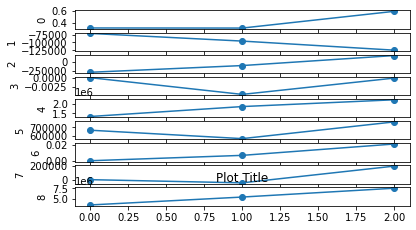

In [1401]:
for i in range(wk1.shape[0]):
    plt.subplot((wk1.shape[0]+1), 1, (i+1))
    x_data = acuwk1[i]
    plt.plot(td_x, x_data, 'o-')
    plt.ylabel(str(i))
        
plt.xlabel('Periods')
plt.title('Plot Title')
plt.show()

In [1497]:
kx = int(np.floor(beta_exog.shape[1] / (1 + m)))
psi_x = beta_exog[:, 0:kx]

In [1498]:
wk = psi_x.reshape((1, psi_x.size), order='F')

In [1499]:
awk = wk
acuwk = wk

In [1500]:
lag=2

In [1501]:
t_p = np.zeros((k, k_x))

In [1502]:
t_p

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [1503]:
for i in range(1, lag+1):
    if (i < (m+1)):
        id_x = (i-1) * kx
        t_p = beta_exog[:, id_x:(id_x+kx)]
    else:
        t_p = np.zeros((k, k_x))
    jj = i-1
    jp = np.minimum(jj, p).astype(int)
    if (jp > 0):
        for j in range(1, (jp+1)):
            jd_x = (j-1) * k
            id_x = (i-j) * k
            w1 = phi[:, jd_x:(jd_x+k)]
            w2 = si[:, id_x:(id_x+kx)]
            t_p = t_p + np.dot(w1, w2)
    psi_x = np.concatenate((psi_x, t_p), axis=1)
    wk = np.concatenate((wk, t_p.reshape((1, t_p.size))), axis=1)
    awk = awk + t_p.reshape((1, t_p.size), order='F')
    acuwk = np.concatenate((acuwk, awk), axis=0)
    # acuwk = acuwk.T

test


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 15

In [ ]:
acuwk.shape

(3, 15)

In [ ]:
acuwk

array([[-1.0488973899132277e-07, 2.113313445315214, -7.889225125406597,
        -0.014375629016853964, -39525182.79546654, -56964780.35711527,
        0.22658367326700812, -1363052.5205810666, -2204665.3285360336,
        7.394795284089591e-08, -0.0999305992304329, 10.74936921430617,
        -1.9043310691209305e-08, 0.7708554330031561, 1.4981595556699006],
       [-2.0977947798264554e-07, 4.226626890630428, -15.778450250813194,
        -0.028751258033707927, -79050365.59093308, -113929560.71423054,
        0.45316734653401625, -2726105.041162133, -4409330.657072067,
        1.4789590568179182e-07, -0.1998611984608658, 21.49873842861234,
        -3.808662138241861e-08, 1.5417108660063121, 2.996319111339801],
       [0.0018923879834534384, -12893.320217814782, 504999.0278935545,
        0.21724650576021617, -77789841.78088874, -95806914.13779262,
        0.5356627792753268, -286562.2415459296, 7366560.918169823,
        -0.0016473083206229213, -9764.08600174614, 1641596.1245290784,
     

In [ ]:
wk

array([[-1.0488973899132277e-07, 2.113313445315214, -7.889225125406597,
        -0.014375629016853964, -39525182.79546654, -56964780.35711527,
        0.22658367326700812, -1363052.5205810666, -2204665.3285360336,
        7.394795284089591e-08, -0.0999305992304329, 10.74936921430617,
        -1.9043310691209305e-08, 0.7708554330031561, 1.4981595556699006,
        -1.0488973899132277e-07, -0.014375629016853964,
        0.22658367326700812, 7.394795284089591e-08,
        -1.9043310691209305e-08, 2.113313445315214, -39525182.79546654,
        -1363052.5205810666, -0.0999305992304329, 0.7708554330031561,
        -7.889225125406597, -56964780.35711527, -2204665.3285360336,
        10.74936921430617, 1.4981595556699006, 0.0018925977629314211,
        0.2459977637939241, 0.0824954327413105, -0.001647456216528603,
        2.2996861220810633e-08, -12897.546844705412, 1260523.8100443552,
        2439542.7996162036, -9763.88614054768, -0.2695746123988242,
        505014.8063438053, 18122646.57643

In [ ]:
awk.shape

(1, 15)

In [ ]:
acuwk

array([[-1.0488973899132277e-07, 2.113313445315214, -7.889225125406597,
        -0.014375629016853964, -39525182.79546654, -56964780.35711527,
        0.22658367326700812, -1363052.5205810666, -2204665.3285360336,
        7.394795284089591e-08, -0.0999305992304329, 10.74936921430617,
        -1.9043310691209305e-08, 0.7708554330031561, 1.4981595556699006],
       [-2.0977947798264554e-07, 4.226626890630428, -15.778450250813194,
        -0.028751258033707927, -79050365.59093308, -113929560.71423054,
        0.45316734653401625, -2726105.041162133, -4409330.657072067,
        1.4789590568179182e-07, -0.1998611984608658, 21.49873842861234,
        -3.808662138241861e-08, 1.5417108660063121, 2.996319111339801],
       [0.0018923879834534384, -12893.320217814782, 504999.0278935545,
        0.21724650576021617, -77789841.78088874, -95806914.13779262,
        0.5356627792753268, -286562.2415459296, 7366560.918169823,
        -0.0016473083206229213, -9764.08600174614, 1641596.1245290784,
     

In [1504]:
import varx

In [1509]:
var_class = varx.VARX(df=df, endog=endog, exog=exog, lag=2, x_lag=2, cumulative_irf=True)


AttributeError: 'VARX' object has no attribute 'df'